# Detection of depression and mental illness in Twitter

## Understanding Depression
Depression is a psychological disorder characterized by persistent feelings of sadness lasting for a minimum of two weeks. 
It leads to an inability to carry out daily activities, causing individuals to lose interest and pleasure in the things they typically enjoy.

Depression symptoms can range from mild to severe, encompassing:

* Feeling perpetually sad or experiencing a consistent depressed mood
* Losing interest or pleasure in activities once found enjoyable
* Experiencing changes in appetite that result in unexplained weight loss or gain
* Struggling with sleep, either sleeping excessively or having trouble sleeping
* Suffering from a lack of energy or increased fatigue
* Dealing with feelings of worthlessness or guilt
* Experiencing difficulty in thinking, concentrating, or making decisions
* Battling with thoughts of death or suicide

### The Impact of Depression

Beyond the symptoms previously described, depression carries substantial health and economic risks. In North America, the yearly probability of a major depressive episode is estimated at 3–5% for males and 8–10% for females.The World Health Organization (WHO) estimated that depression has impacted 264 million people worldwide.

Severe depression can even lead to suicidal cases. Annually, approximately 0.8 million suicides occur worldwide, with 60% of these cases attributed to depression (according to Nature Reviews Disease Primers). Furthermore, depression contributes to the development of various chronic diseases, such as diabetes and heart disease, among those affected.

Individuals dealing with depression often find it challenging to engage with coworkers, friends, and family, leading to a deterioration of their social lives. Additionally, depression can lead to substance abuse issues, including drug addiction and smoking.

The reduced ability to derive enjoyment from daily activities and the constant experience of exhaustion contribute to decreased productivity, ultimately affecting economic well-being. Therefore, timely treatment is crucial to mitigate the potential severe socio-economic consequences that individuals with depression may face.

In conclusion, depression is a highly prevalent disease that can cause significant harm and, in extreme cases, even lead to loss of life.


## Depression on Social Media
Social media platforms are becoming an integral part of people’s life. They reflect the user’s personal life. People like to share happiness, joy, and sadness on social media. These platforms are used for researchers to identify the causes of depression and detect it.

Detecting earlier depression can be a huge step to address the mental illness and offer support to the people suffering from this terrible mental illness.

## About the data set



The dataset is a collection of posts from the "SuicideWatch" and "depression" subreddits of the Reddit platform. The posts are collected using Pushshift API. All posts that were made to "SuicideWatch" from Dec 16, 2008(creation) till Jan 2, 2021, were collected while "depression" posts were collected from Jan 1, 2009, to Jan 2, 2021. All posts collected from SuicideWatch are labeled as suicide and not suicide.

The data set can be found here: https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch/data

   
   
### Imports and upload of the data set

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import collections
import torch

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
full_df = pd.read_csv('/tweets')
# We will take only part of the data
df = full_df.sample(n=40000, random_state=42)

In [6]:
print(len(df) )
df.head()

40000


,Unnamed: 0,text,class
74414,111734,I Don't know?7? Months self harm free and the ...,suicide
149516,224358,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide
12484,18790,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide
14043,21196,I've honestly got no idea what to do anymore.I...,suicide
30673,46089,Do you ever just cry? Like you just think abou...,non-suicide


#### Cleaning the data

To avoid noise we will clean the data. First, we will delete an unnecessary column.<br>
Then we wull clean the text. Change all words to be with lower case, remove unnecessary words,Emoji’s, \n url that only add noise.<br>
In addition, we will remove stop words, stop words are common words within sentences that do not add value and thus can be eliminated when cleaning for NLP prior to analysis.<br>
Finally we will use <b>PorterStemmer</b> to recognize the root of each word.

We apply all thoes methods in obtain to reduct the nois in our training process later.

In [7]:
# delete 'Unnamed: 0'
print(df.columns)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("New columns:" , df.columns)


Index(['Unnamed: 0', 'text', 'class'], dtype='object')
New columns: Index(['text', 'class'], dtype='object')


In [8]:
clean_df = df.copy()
stop = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [9]:
%%time

# Apply the cleaning operations to the 'text' column in the clean_df1 DataFrame
clean_df['text'] = clean_df['text'].str.lower()
clean_df['text'] = clean_df['text'].str.replace(r'(@\w+)|([^0-9A-Za-z \t \n])|(\w+:\/\/\S+)|^rt', '', regex=True)
clean_df['text'] = clean_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
clean_df['text'] = clean_df['text'].apply(lambda x: ' '.join([stemmer.stem(i) for i in x.split()]))


CPU times: total: 1min 14s
Wall time: 1min 25s


Let's comapre the changes:

In [10]:
change_example = 3
i =1
while 0 < change_example:
    if len(df.iloc[i]['text'].split()) < 75: #for remain it simple
        print(f'\nNot clean data {i}:')
        print(df.iloc[i]['text'])
        
        print(f'Clean data {i}:')
        print(clean_df.iloc[i]['text'])
        print(f'class: {clean_df.iloc[i]["class"]}')
        change_example-=1
    i+=1



Not clean data 1:
I HAVE TO START BECOMING RICH I HAVE TO START MY COMPANY SO WHEN I BECOME 16 I CAN AFFORD A BIG VAN AND GO ON TRIPS WITH MY FRIENDS BUT I HAVE NO TIME LEFT I HAVE TO START WORKING
Clean data 1:
start becom rich start compani becom 16 afford big van go trip friend time left start work
class: non-suicide

Not clean data 2:
A poem (haiku) for u/Me-Game-Dev hi, hello hello
stop fucking saying hello
i know where you live
Clean data 2:
poem haiku umegamedev hi hello hello stop fuck say hello know live
class: non-suicide

Not clean data 4:
Do you ever just cry? Like you just think about how unfair life is and you just cry? And if you can't cry do you ever just sit there and you can't do anything about it?

Like seriously I'm just sitting here crying because just the world sucks and my life sucks and ugh
Clean data 4:
ever cri like think unfair life cri cant cri ever sit cant anyth like serious im sit cri world suck life suck ugh
class: non-suicide


Despite the various data cleaning steps we have undertaken, it is still possible to make educated inferences about whether someone is discussing suicidal thoughts or not based on the cleaned version of the text.

## EDA


non-suicide    20065
suicide        19935
Name: class, dtype: int64


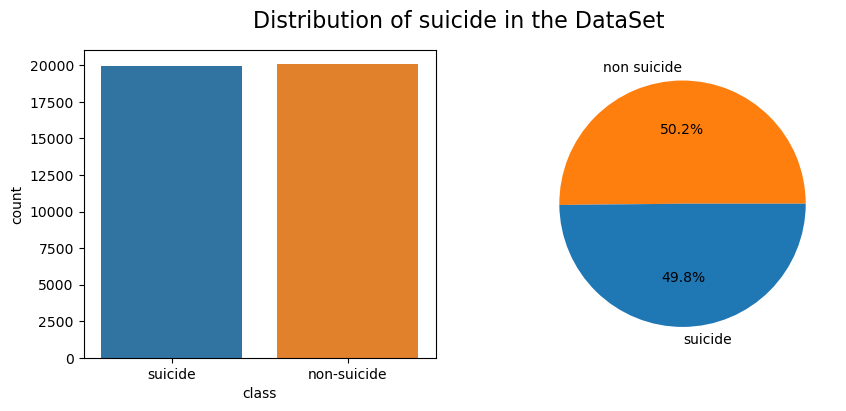

In [11]:
classCnt = df['class'].value_counts()
print(classCnt)
colors = [sns.color_palette()[0],sns.color_palette()[1]]
plt.figure(figsize = ((10,4)))

plt.subplot(1,2,1)
sns.countplot(df,x='class', palette=colors )

plt.subplot(1,2,2)
plt.pie(classCnt,labels = ['non suicide','suicide'],autopct='%.1f%%' , colors=colors[::-1])
plt.suptitle('Distribution of suicide in the DataSet', fontsize=16)

plt.show()

#### Word cloud
We want to know what words domanite in suicide and not suicide classes.<br>
This insight can tell us what words are indicate on suicide.

In [12]:
all_text = ' '.join(clean_df['text'])
suicide_text =' '.join(clean_df.where(clean_df['class'] == 'suicide').dropna()['text'])
non_suicide_text =' '.join(clean_df.where(clean_df['class'] == 'non-suicide').dropna()['text'])

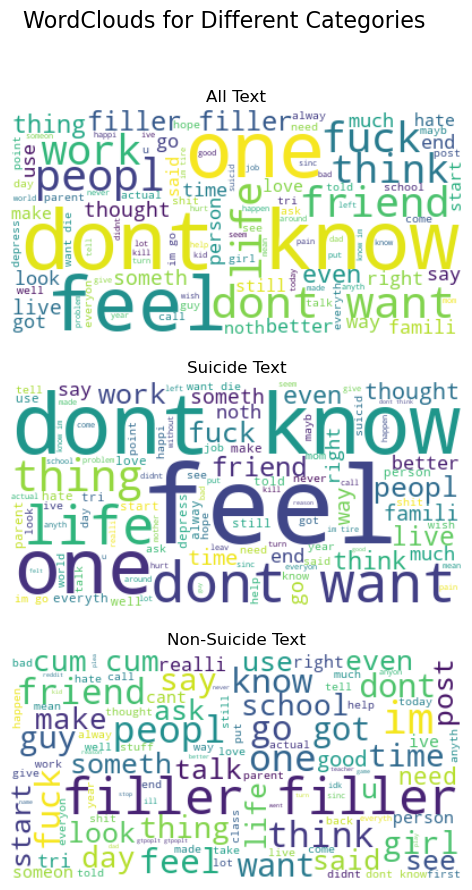

CPU times: total: 29.8 s
Wall time: 33.9 s


In [13]:
%%time

# Create WordClouds for each category
wordcloud_all = WordCloud( background_color='white',max_words=100).generate(all_text)
wordcloud_suicide = WordCloud( background_color='white',max_words=100).generate(suicide_text)
wordcloud_non_suicide = WordCloud( background_color='white',max_words=100).generate(non_suicide_text)

# Create subplots and titles
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle("WordClouds for Different Categories", fontsize=16)

# Plot the WordClouds with titles
axes[0].imshow(wordcloud_all, interpolation="bilinear")
axes[0].set_title("All Text")
axes[0].axis("off")

axes[1].imshow(wordcloud_suicide, interpolation="bilinear")
axes[1].set_title("Suicide Text")
axes[1].axis("off")

axes[2].imshow(wordcloud_non_suicide, interpolation="bilinear")
axes[2].set_title("Non-Suicide Text")
axes[2].axis("off")

# Display the combined plot with WordClouds and titles
plt.show()

We can see what are the common words for each category.<br>
For example, in the sucicde class the common words are: feel, im, life go dont want and more.

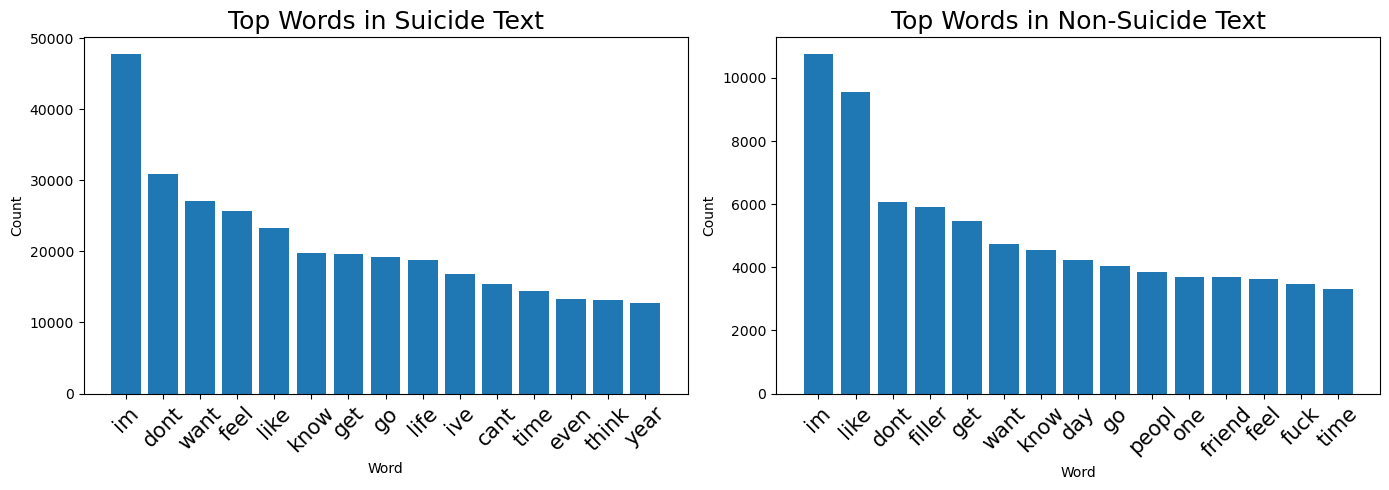

In [14]:

# Filter and count words in the "suicide" text
filtered_words_suicide = [word for word in suicide_text.split() if word not in stop]
counted_words_suicide = collections.Counter(filtered_words_suicide)
top_words_suicide = counted_words_suicide.most_common(15)

# Filter and count words in the "non-suicide" text
filtered_words_non_suicide = [word for word in non_suicide_text.split() if word not in stop]
counted_words_non_suicide = collections.Counter(filtered_words_non_suicide)
top_words_non_suicide = counted_words_non_suicide.most_common(15)

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot the top words for "suicide" text
word_count_suicide = {word: count for word, count in top_words_suicide}
axes[0].bar(word_count_suicide.keys(), word_count_suicide.values())
axes[0].set_xlabel('Word')
axes[0].set_ylabel('Count')
axes[0].set_title('Top Words in Suicide Text',fontsize=18)
axes[0].tick_params(axis='x', rotation=45, labelsize=15)

# Plot the top words for "non-suicide" text
word_count_non_suicide = {word: count for word, count in top_words_non_suicide}
axes[1].bar(word_count_non_suicide.keys(), word_count_non_suicide.values())
axes[1].set_xlabel('Word')
axes[1].set_ylabel('Count')
axes[1].set_title('Top Words in Non-Suicide Text', fontsize=18)
axes[1].tick_params(axis='x', rotation=45, labelsize=15)

plt.tight_layout()  # Ensure labels don't overlap
plt.show()


In the sucide class :Many of the words seem to be related to emotions, thoughts, and personal feelings, which is expected in the context of discussions about suicide.
Some words like "life," "year," and "time" suggest a longer-term perspective and may be associated with discussions of life challenges and struggles.

For "Non-Suicide" Text:

The most common words in "non-suicide" text are "im," "like," "dont," "get," "day," and others.
These words appear to be more general and less emotionally charged compared to the "suicide" text.
"filler" and "friend" suggest casual or friendly discussions, which are common in non-suicidal contexts.

We aim to compare the usage of 'suicide_words' to determine whether individuals discussing suicide tend to use these words more frequently. To account for the influence of the total number of words used, we will normalize the counts by dividing them by the total word count. This normalization allows us to analyze the proportional use of 'suicide_words' in the context of the overall discussion.

In [15]:
proportions = round(len(suicide_text)/len(non_suicide_text))

print(f'Number of words of sucide class: {len(suicide_text)}')
print(f'Number of words of non sucide class: {len(non_suicide_text)}')
print(f'Number of words of sucide class is {proportions} times then Number of words of non sucide class')

Number of words of sucide class: 11187658
Number of words of non sucide class: 3604616
Number of words of sucide class is 3 times then Number of words of non sucide class


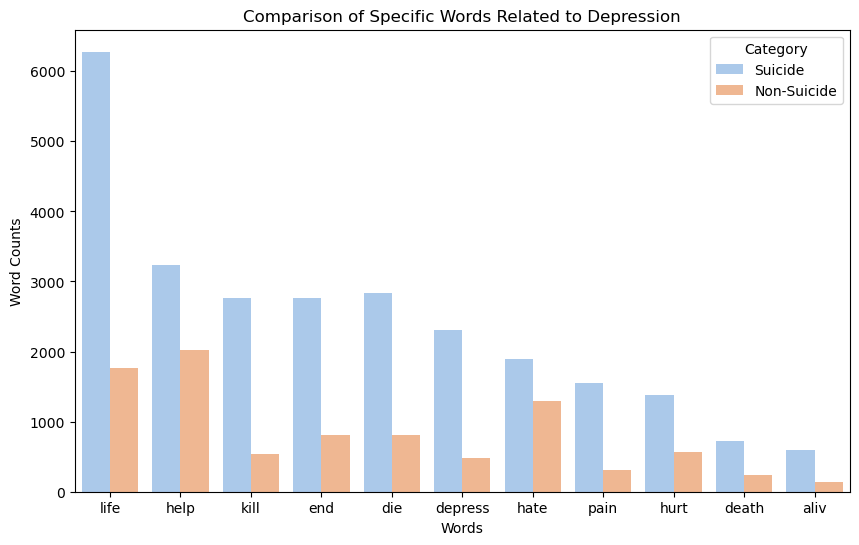

In [16]:

# Define the specific words you want to compare
suicide_words = ['life', 'help', 'kill', 'end','die','depress','hate', 'pain','hurt','death','aliv']

# Initialize dictionaries to store word counts for each category
word_counts_suicide = {}
word_counts_non_suicide = {}

# Count the occurrences of specific words in "suicide" text
for word in suicide_words:
    word_counts_suicide[word] = counted_words_suicide.get(word, 0)

# Count the occurrences of specific words in "non-suicide" text
for word in suicide_words:
    word_counts_non_suicide[word] = counted_words_non_suicide.get(word, 0)

# Create a DataFrame to prepare the data for plotting
data = {
    'Word': suicide_words * 2,  # Repeat the specific words for both categories
    'Category': ['Suicide'] * len(suicide_words) + ['Non-Suicide'] * len(suicide_words),
    'Count': [word_counts_suicide[word]/proportions for word in suicide_words] + [word_counts_non_suicide[word] for word in suicide_words]
}



# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data= pd.DataFrame(data), x='Word', y='Count', hue='Category', palette='pastel')
plt.xlabel('Words')
plt.ylabel('Word Counts')
plt.title('Comparison of Specific Words Related to Depression')
plt.legend(title='Category')
plt.show()


We can see that tere is no propostion in the use of "sucide" words.<br>

Another way to explore the signifcant of words is to use the TF-IDF measure.
TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents

Term Frequency (TF):

TF measures how often a term appears in a document.

It is calculated as the number of times a term occurs in a document divided by the total number of terms in the document.<br>
A high TF indicates that a term is frequent in a specific document.
Inverse Document Frequency (IDF):

IDF measures how unique or rare a term is across a collection of documents.
It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.
A high IDF indicates that a term is rare across the entire collection.

TF-IDF Score:<br>
The TF-IDF score for a term in a document is the product of its TF and IDF scores.<br>
A high TF-IDF score indicates that a term is both frequent in a specific document and rare across the entire collection, making it potentially significant.

In [14]:
def visualize_tfidf(df, text_column, category_column, specific_words):
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the text data
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column])

    # Create a DataFrame with TF-IDF scores
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Add the category column to the TF-IDF DataFrame
    tfidf_df[category_column] = df[category_column].values

    # Filter DataFrame for the specific words
    specific_words_df = tfidf_df[[' '.join(word.split()) for word in specific_words + [category_column]]]

    # Melt the DataFrame for visualization
    melted_df = specific_words_df.melt(id_vars=category_column, var_name='Word', value_name='TF-IDF Score')

    # Plot a bar chart for each word
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='TF-IDF Score', hue=category_column, data=melted_df)
    plt.title('TF-IDF Visualization for Specific Words')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example usage:
# Assuming df is your DataFrame with 'text' and 'class' columns
# specific_words is a list of words you are interested in
visualize_tfidf(clean_df, 'text', 'class', suicide_words)


MemoryError: Unable to allocate 16.3 GiB for an array with shape (54670, 40000) and data type float64

Indeed, the prominence of suicide-related words appears to be more significant within the suicide category.


We've observed that suicide-related posts generally have a higher overall word count. However, to delve deeper into this pattern, we are investigating the word count distribution in individual posts categorized as suicide-related or not.


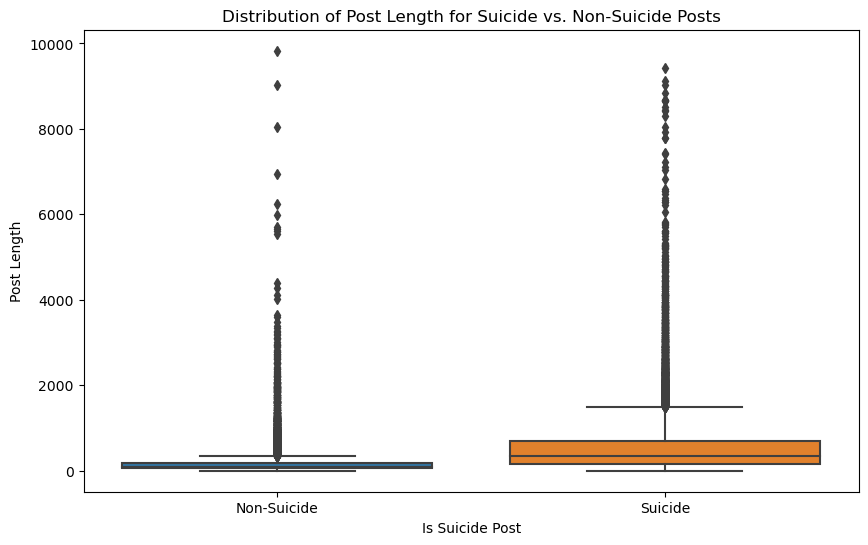

In [74]:
clean_df['is_suicide'] = clean_df['class'].apply(lambda x: 1 if x == 'suicide' else 0)

# Calculate the length of each post
clean_df['post_length'] = clean_df['text'].apply(len)

length_df = clean_df[clean_df['post_length']<10000]

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_suicide', y='post_length', data=length_df)
plt.xlabel('Is Suicide Post')
plt.ylabel('Post Length')
plt.title('Distribution of Post Length for Suicide vs. Non-Suicide Posts')
plt.xticks([0, 1], ['Non-Suicide', 'Suicide'])

plt.show()

Since the number of posts in each category is nearly equal, we can conclude that suicide-related posts tend to be longer.

###  Splitting ths data

In [75]:
encoded_df = clean_df.reset_index()[['text','is_suicide']]
features = encoded_df.drop(columns=['is_suicide'], axis = 1)
target = encoded_df['is_suicide']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  32000
Number of test dataset:  8000
Total number of dataset:  40000


## Preprocessing
### Tokenization and Encoding the text by CountVectorizer

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize CountVectorizer to convert text to a bag-of-words
vectorizer = CountVectorizer()

# Fit and transform the text data to create the bag-of-words representation for training
X_train_vectors = vectorizer.fit_transform(X_train['text'])

# Transform the test data using the same vectorizer
X_test_vectors = vectorizer.transform(X_test['text'])

## Claasic models


In [77]:
without_pipelines_acc= {}

#### logistic regression


In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectors, y_train)
predicted = model.predict(X_test_vectors)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
without_pipelines_acc['logistic regression'] = accuracy
print("Accuracy:", accuracy)

Accuracy: 0.921375


#### Naive Bayes classifier

In [79]:
model = MultinomialNB()
model.fit(X_train_vectors, y_train)
predicted = model.predict(X_test_vectors)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
without_pipelines_acc['Naive_bayes'] = accuracy
print("Accuracy:", accuracy)


Accuracy: 0.889375


#### Support vectors mechaine

In [80]:
from sklearn import svm

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train_vectors,y_train)
predicted = svm_clf.predict(X_test_vectors)
accuracy = accuracy_score(y_test, predicted)
without_pipelines_acc['SVM'] = accuracy

print("Accuracy:", accuracy)

Accuracy: 0.911375


#### Random forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_vectors, y_train)
predicted = model.predict(X_test_vectors)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
without_pipelines_acc['Random forest'] = accuracy
print("Accuracy:", accuracy)

Accuracy: 0.883375


### Using same techniques but with pipelines and TfidfVectorizer feature_extraction
TfidfTransformer is a tool for converting raw text data into a numeric representation that can be used as input for machine learning models.

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, x_train, x_test, y_train, y_test ):
    # convert x_train and x_test to one demension
    x_train = x_train.values.ravel()
    x_test = x_test.values.ravel()

    # model training

    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred)

In [83]:
pipeline_acc = {}

#### logistic regression

In [84]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
pipeline_acc['logistic regression'] = classify(model, X_train, X_test, y_train, y_test)

Accuracy: 92.7375
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4085
           1       0.93      0.92      0.93      3915

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000



#### naive_bayes

In [85]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
pipeline_acc['Naive_bayes'] = classify(model, X_train, X_test, y_train, y_test)

Accuracy: 86.05000000000001
              precision    recall  f1-score   support

           0       0.97      0.75      0.85      4085
           1       0.79      0.98      0.87      3915

    accuracy                           0.86      8000
   macro avg       0.88      0.86      0.86      8000
weighted avg       0.88      0.86      0.86      8000



#### SVM

In [86]:
from sklearn.svm import SVC
model = SVC(C=3, kernel = 'linear')
pipeline_acc['SVM'] =classify(model, X_train, X_test, y_train, y_test)

Accuracy: 92.63749999999999
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4085
           1       0.93      0.91      0.92      3915

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000



#### Random forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
pipeline_acc['Random forest'] = classify(model, X_train, X_test, y_train, y_test)

Accuracy: 89.8875
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4085
           1       0.89      0.90      0.90      3915

    accuracy                           0.90      8000
   macro avg       0.90      0.90      0.90      8000
weighted avg       0.90      0.90      0.90      8000



### Compare models
We want now to compare the basic models with the models that used pipeline and feature extraction

In [88]:
print(without_pipelines_acc,pipeline_acc, sep = '\n')

{'logistic regression': 0.921375, 'Naive_bayes': 0.889375, 'SVM': 0.911375, 'Random forest': 0.883375}
{'logistic regression': 0.927375, 'Naive_bayes': 0.8605, 'SVM': 0.926375, 'Random forest': 0.898875}


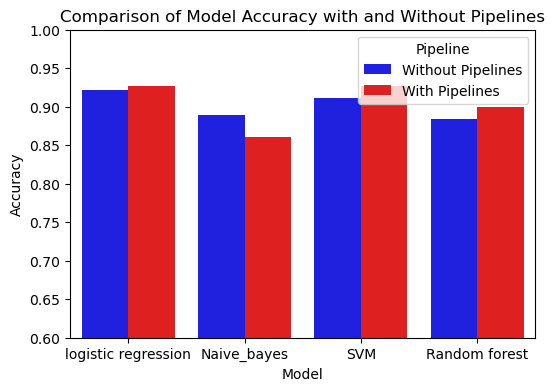

In [89]:
# Create DataFrames for each set of results
df_without_pipelines = pd.DataFrame(list(without_pipelines_acc.items()), columns=['Model', 'Accuracy'])
df_without_pipelines['Pipeline'] = 'Without Pipelines'

df_with_pipelines = pd.DataFrame(list(pipeline_acc.items()), columns=['Model', 'Accuracy'])
df_with_pipelines['Pipeline'] = 'With Pipelines'

# Concatenate the DataFrames
df_combined = pd.concat([df_without_pipelines, df_with_pipelines])

# Plotting with Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', hue='Pipeline', data=df_combined, palette=['blue', 'red'])
plt.ylim(0.6, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy with and Without Pipelines')

# Show the plot
plt.show()

The results seems to be almost the same

## NN models
### preprocessing for the nn models
#### build a vocabulary

In [90]:
from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer("basic_english")

def build_vocabulary(datasets):
    for dataset in datasets:
        for text in dataset:
            yield tokenizer(text)

# Set the default index during vocabulary construction
vocab = build_vocab_from_iterator(build_vocabulary([X_train.text]),
                                  min_freq=5,
                                  specials=["<UNK>"],
                                  special_first=True)
vocab.set_default_index(0)


In [91]:
def vectorize_batch(X):
    max_words = 100
    X = [vocab(tokenizer(text)) for text in X]
    X = [tokens+([0]* (max_words-len(tokens))) if len(tokens)<max_words else tokens[:max_words] for tokens in X] ## Bringing all samples to max_words length.
    return X


In [92]:
len(vocab)

10125

### LSTM model with tensorflow

In [93]:
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

model = Sequential([
    Embedding(len(vocab)+1, 100, trainable=True),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         1012600   
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1163129 (4.44 MB)
Trainable params: 1163

Convert the words to vectors

In [94]:
X_train_tensor_flow = np.array(vectorize_batch(X_train.text))
X_test_tensor_flow = np.array(vectorize_batch(X_test.text))

In [95]:
X_train_tensor_flow.shape

(32000, 100)

In [96]:
history = model.fit(X_train_tensor_flow, y_train, epochs=15, batch_size=128, validation_data=(X_test_tensor_flow, y_test))

Epoch 1/15
250/250 [==============================] - 71s 260ms/step - loss: 0.3100 - accuracy: 0.8695 - val_loss: 0.2212 - val_accuracy: 0.9222
Epoch 2/15
250/250 [==============================] - 60s 240ms/step - loss: 0.1905 - accuracy: 0.9336 - val_loss: 0.2149 - val_accuracy: 0.9239
Epoch 3/15
250/250 [==============================] - 60s 242ms/step - loss: 0.1649 - accuracy: 0.9462 - val_loss: 0.2749 - val_accuracy: 0.9189
Epoch 4/15
250/250 [==============================] - 73s 294ms/step - loss: 0.1417 - accuracy: 0.9523 - val_loss: 0.2184 - val_accuracy: 0.9197
Epoch 5/15
250/250 [==============================] - 72s 289ms/step - loss: 0.1245 - accuracy: 0.9599 - val_loss: 0.2282 - val_accuracy: 0.9159
Epoch 6/15
250/250 [==============================] - 88s 352ms/step - loss: 0.1209 - accuracy: 0.9599 - val_loss: 0.2351 - val_accuracy: 0.9125
Epoch 7/15
250/250 [==============================] - 69s 275ms/step - loss: 0.1077 - accuracy: 0.9649 - val_loss: 0.2807 - val_ac

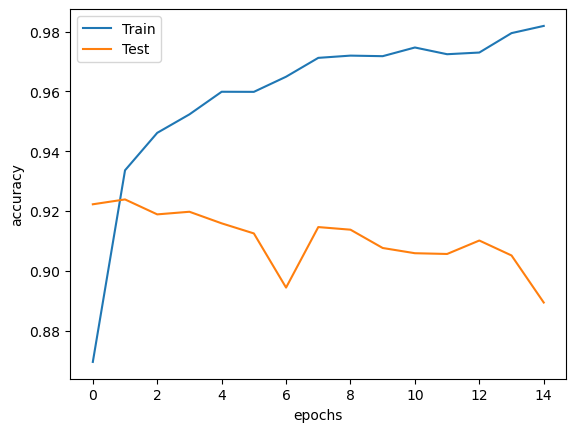

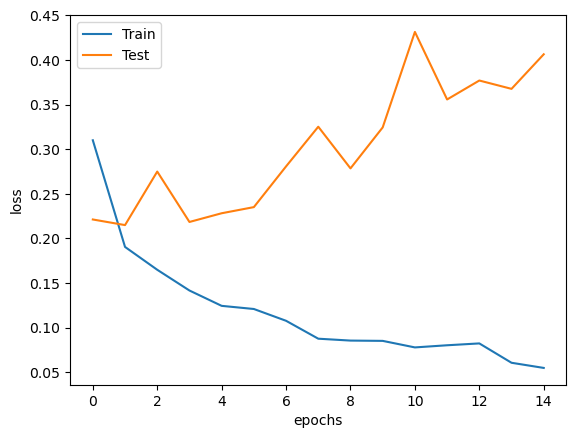

In [97]:
# visualize the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

We got classic overfit problem when the train results is much beteer then the test results.

### LSTM with pytorch

#### Create pyTorch dataset from our dataframe
create pytorch dataset and dataloader

In [118]:
from torch.utils.data import TensorDataset

train = TensorDataset(torch.tensor(vectorize_batch(X_train.text), dtype=torch.int32).detach(), torch.tensor(y_train.values))
test = TensorDataset(torch.tensor(vectorize_batch(X_test.text), dtype=torch.int32).detach(),torch.tensor(y_test.values))

In [119]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train, batch_size=128, shuffle=True)
test_loader = DataLoader(test, batch_size=32, shuffle=True)

In [120]:
for X, Y in train_loader:
    print(X.shape, Y.shape)
    break

torch.Size([128, 100]) torch.Size([128])


#### Train Network
In this section, we have trained our new network using the same settings that we have been using for all our approaches. The loss and accuracy getting printed after completion of each epoch hints that the model is doing a good job at the text classification task.



In [121]:
def iterate_batch(text, labels,model,optimizer,CE_loss):
    optimizer.zero_grad()
    y_model = model(text)
    loss = CE_loss(y_model,labels)
    loss.backward()
    optimizer.step()
    predicted_labels = y_model.argmax(dim=1)
    acc = (predicted_labels == labels).sum() / len(labels)
    return loss.detach(), acc.detach()

def eval_model_test(model,CE_loss):
    loss = 0.
    acc  = 0.
    test_batches = len(test_loader)
    for text, labels in test_loader:
        with torch.no_grad():
            y_model = model(text) 
            loss   += CE_loss(y_model, labels)
            predicted_labels = y_model.argmax(dim=1)
            acc += (predicted_labels == labels).sum() / len(labels)
    return loss/test_batches, acc/test_batches
     
     

def iterate_epoch(model,optimizer,CE_loss):
    running_loss = 0.
    running_acc  = 0.
    for texts, labels in train_loader:
        batch_loss, batch_acc = iterate_batch(texts, labels,model,optimizer,CE_loss)
        running_loss += batch_loss
        running_acc  += batch_acc
    loss = running_loss/batches
    acc  = running_acc/batches
    return loss, acc
     




In [122]:


def showLossAndAccurcy(train_accuracy,train_loss,test_accuracy,test_loss):
    plt.figure(figsize=(11 ,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss.detach(), label="Train")
    plt.plot(test_loss.detach(), label="Test")
    plt.legend()
    plt.title("CE loss");
    plt.xlabel("Batch Number");
    plt.subplot(1,2,2)
    plt.plot(train_accuracy.detach(), label="Train")
    plt.plot(test_accuracy.detach(), label="Test")
    plt.legend()
    plt.title("Accuracy");
    plt.xlabel("Batch Number");

    plt.show()


#### LSTM

We will use ths same net that we used with tensor flow but with pytorch

In [123]:
import torch.nn as nn
import torch.nn.functional as F


embed_dim = 100
hidden_dim1 = 128
hidden_dim2 = 256

LSTMlayers = 1
target_classes = 2

class LSTMClassifier(nn.Module):
    def __init__(self, num_embeddings = len(vocab)+1):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=num_embeddings, embedding_dim=embed_dim)
        self.LSTM_layer = nn.LSTM(embed_dim, hidden_dim1, num_layers=LSTMlayers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc2 = nn.Linear(hidden_dim2, target_classes)

    def forward(self, sentence_tokens):
        all_embeddings = self.embedding(sentence_tokens)
        hidden_state_history, _ = self.LSTM_layer(all_embeddings)
        final_output = hidden_state_history[:, -1, :]
        drouput_output1 = self.dropout(final_output)
        output_linear1 = self.fc1(drouput_output1)
        drouput_output2 = self.dropout(output_linear1)
        ouput_linear2 = self.fc2(output_linear1)
        probs = F.softmax(ouput_linear2, dim=1)  # Adding softmax layer

        return probs


                                                                 
                                                                 
                                                   
                                                                 

In [124]:
lstm_classifier = LSTMClassifier()
CE_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm_classifier.parameters(), lr=0.001 )
lstm_classifier

LSTMClassifier(
  (embedding): Embedding(10126, 100)
  (LSTM_layer): LSTM(100, 128, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)

  7%|█████▌                                                                             | 1/15 [00:49<11:27, 49.11s/it]


Epoch 1 - Train Loss: 0.5848, Train Accuracy: 71.29%
Epoch 1 - Test Loss: 0.4911, Test Accuracy: 81.80%


 13%|███████████                                                                        | 2/15 [01:31<09:47, 45.19s/it]


Epoch 2 - Train Loss: 0.4677, Train Accuracy: 84.19%
Epoch 2 - Test Loss: 0.4501, Test Accuracy: 86.14%


 20%|████████████████▌                                                                  | 3/15 [02:12<08:40, 43.42s/it]


Epoch 3 - Train Loss: 0.4410, Train Accuracy: 86.90%
Epoch 3 - Test Loss: 0.4360, Test Accuracy: 87.45%


 27%|██████████████████████▏                                                            | 4/15 [03:00<08:16, 45.14s/it]


Epoch 4 - Train Loss: 0.4388, Train Accuracy: 87.11%
Epoch 4 - Test Loss: 0.4252, Test Accuracy: 88.40%


 33%|███████████████████████████▋                                                       | 5/15 [03:46<07:35, 45.52s/it]


Epoch 5 - Train Loss: 0.4131, Train Accuracy: 89.83%
Epoch 5 - Test Loss: 0.4242, Test Accuracy: 88.65%


 40%|█████████████████████████████████▏                                                 | 6/15 [04:30<06:43, 44.79s/it]


Epoch 6 - Train Loss: 0.4037, Train Accuracy: 90.78%
Epoch 6 - Test Loss: 0.4130, Test Accuracy: 89.79%


 47%|██████████████████████████████████████▋                                            | 7/15 [05:17<06:04, 45.61s/it]


Epoch 7 - Train Loss: 0.3966, Train Accuracy: 91.53%
Epoch 7 - Test Loss: 0.4132, Test Accuracy: 89.76%


 53%|████████████████████████████████████████████▎                                      | 8/15 [06:01<05:15, 45.02s/it]


Epoch 8 - Train Loss: 0.3929, Train Accuracy: 91.88%
Epoch 8 - Test Loss: 0.4127, Test Accuracy: 89.64%


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [07:03<05:02, 50.48s/it]


Epoch 9 - Train Loss: 0.3915, Train Accuracy: 92.06%
Epoch 9 - Test Loss: 0.4154, Test Accuracy: 89.46%


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [07:49<04:04, 48.88s/it]


Epoch 10 - Train Loss: 0.3899, Train Accuracy: 92.25%
Epoch 10 - Test Loss: 0.4038, Test Accuracy: 90.65%


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [08:35<03:12, 48.09s/it]


Epoch 11 - Train Loss: 0.3845, Train Accuracy: 92.79%
Epoch 11 - Test Loss: 0.4049, Test Accuracy: 90.64%


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [09:18<02:20, 46.68s/it]


Epoch 12 - Train Loss: 0.4265, Train Accuracy: 88.31%
Epoch 12 - Test Loss: 0.4533, Test Accuracy: 85.43%


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [10:05<01:33, 46.80s/it]


Epoch 13 - Train Loss: 0.4123, Train Accuracy: 89.78%
Epoch 13 - Test Loss: 0.4088, Test Accuracy: 90.05%


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [10:55<00:47, 47.62s/it]


Epoch 14 - Train Loss: 0.3857, Train Accuracy: 92.61%
Epoch 14 - Test Loss: 0.4032, Test Accuracy: 90.70%


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [11:37<00:00, 46.51s/it]


Epoch 15 - Train Loss: 0.3766, Train Accuracy: 93.55%
Epoch 15 - Test Loss: 0.4027, Test Accuracy: 90.79%


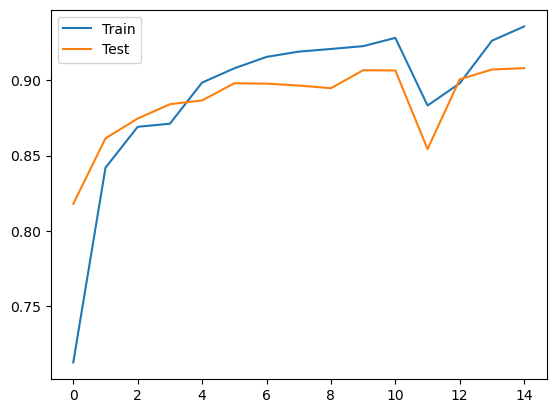

In [125]:

epochs=15
batches    = len(train_loader)
train_loss = torch.zeros(epochs)
train_accuracy  = torch.zeros(epochs)
test_loss  = torch.zeros(epochs)
test_accuracy   = torch.zeros(epochs)

for epoch_idx in tqdm(range(epochs)):
    lstm_classifier.train()
    train_loss[epoch_idx], train_accuracy[epoch_idx] = iterate_epoch(lstm_classifier,optimizer,CE_loss)
    test_loss[epoch_idx],  test_accuracy[epoch_idx]  = eval_model_test(lstm_classifier,CE_loss)
    lstm_classifier.eval()
    print(f"\nEpoch {epoch_idx + 1} - Train Loss: {train_loss[epoch_idx]:.4f}, Train Accuracy: {train_accuracy[epoch_idx]*100:.2f}%")
    print(f"Epoch {epoch_idx + 1} - Test Loss: {test_loss[epoch_idx]:.4f}, Test Accuracy: {test_accuracy[epoch_idx]*100:.2f}%")


plt.plot(train_accuracy.detach(), label="Train")
plt.plot(test_accuracy.detach(), label="Test")
plt.legend()
plt.show()


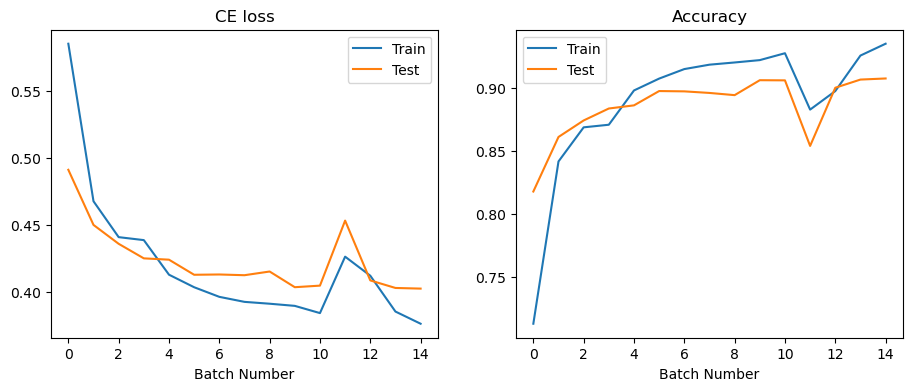

In [126]:
showLossAndAccurcy(train_accuracy,train_loss,test_accuracy,test_loss)

### Evaluate pytorch Network Performance
Here, we have evaluated the performance of our network from this approach by calculating various ML metrics.


In [127]:
def make_prediction(model, loader):
    model.eval()  # Set the model to evaluation mode
    all_labels, all_predictions = [], []

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)
            all_labels.append(labels.numpy())
            all_predictions.append(predictions.numpy())

    all_labels = [item for sublist in all_labels for item in sublist]
    all_predictions = [item for sublist in all_predictions for item in sublist]

    return all_labels,all_predictions

# Calculate confusion matrix on the test dataset
all_labels,all_predictions = make_prediction(lstm_classifier, test_loader)

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 90.85%


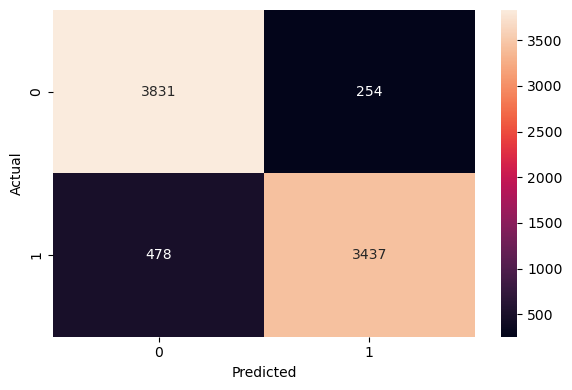

In [128]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


conf_matrix = confusion_matrix(all_labels, all_predictions )
# Create a heatmap of the confusion matrixt
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [129]:
target_classes= ['suicide','non_suicide']

In [130]:
X_test_text, Y_test = [], []
for x,y in zip(X_test.text,y_test.values):
    X_test_text.append(x)
    Y_test.append(y)

len(X_test_text)

8000

In [131]:
from lime import lime_text

explainer = lime_text.LimeTextExplainer(class_names=target_classes, verbose=True)

max_words = 100

def make_predictions(X_batch_text):
    X = [vocab(tokenizer(text)) for text in X_batch_text]
    X = [tokens+([0]* (max_words-len(tokens))) if len(tokens)<max_words else tokens[:max_words] for tokens in X] ## Bringing all samples to max_words length.
    logits = lstm_classifier(torch.tensor(X, dtype=torch.int32))
    preds = F.softmax(logits, dim=1)
    return preds.detach().numpy()

rng = np.random.RandomState(1)
idx = rng.randint(1, len(X_test_text))
X = [vocab(tokenizer(text)) for text in X_test_text[idx:idx+1]]
preds = lstm_classifier(torch.tensor(X, dtype=torch.int32))
preds = F.softmax(preds, dim=-1)

print("Prediction : ", target_classes[preds.argmax()])
print("Actual :     ", target_classes[Y_test[idx]])

Prediction :  suicide
Actual :      suicide


In [132]:
explanation = explainer.explain_instance(X_test_text[idx], classifier_fn=make_predictions,
                                         labels=Y_test[idx:idx+1])
explanation.show_in_notebook()

Intercept 0.7310582340633596
Prediction_local [0.73105824]
Right: 0.73105824


### DIY

In this section, users can input a sentence, and the system will provide them with the corresponding result.

In [133]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'(@\w+)|([^0-9A-Za-z \t \n])|(\w+:\/\/\S+)|^rt', '', text)
    text = ' '.join([word for word in text.split() if word not in stop])
    text = ' '.join([stemmer.stem(i) for i in text.split()])
    return text

def vectorize_text(X):
    max_words = 100
    X = vocab(tokenizer(X))
    X = X + [0] * (max_words - len(X)) if len(X) < max_words else X[:max_words]  # Bringing all samples to max_words length.
    return X


def DIY(text, result, m=lstm_classifier):
    X = vectorize_text(clean_text(text))
    
    # Convert the tensor X back to a text string
    text_instance = " ".join(vocab.get_itos()[idx] for idx in X)
    X = torch.tensor(X, dtype=torch.long)
    
    # The model expects the first dimension is the size of the batch
    X = X.unsqueeze(0)

    with torch.no_grad():
        pred = m(X)
        predicted_labels = pred.argmax(dim=1)
        print("Prediction Tensor:", predicted_labels)

    print("Actual:", result)
    return predicted_labels.item()




In [134]:
suicide_example = 'I just want to die'
DIY(suicide_example,1)
non_suicide_example = 'Have a nice day'
DIY(non_suicide_example,0)

Prediction Tensor: tensor([1])
Actual: 1
Prediction Tensor: tensor([0])
Actual: 0


0

## Compare Tensor Flow and Pytorch

In [135]:
# Convert TensorFlow model predictions to numpy array
y_test_pred_tf = np.round( (model.predict(X_test_tensor_flow)))
y_actual_tf = np.array(y_test)
# Convert PyTorch model predictions to numpy array
lstm_classifier.eval()
with torch.no_grad():
    Y_actual, Y_preds = make_prediction(lstm_classifier, test_loader)
Y_preds_np = np.array(Y_preds)

# Ensure that Y_preds_np is a 2D array
if len(Y_preds_np.shape) > 1:
    y_test_pred_pytorch = np.argmax(Y_preds_np, axis=1)
else:
    y_test_pred_pytorch = Y_preds_np  # No need for argmax if it's already 1D

# Convert PyTorch ground truth to numpy array
Y_actual_np = np.array(Y_actual)

# Evaluate accuracy
accuracy_tf = accuracy_score(y_actual_tf, y_test_pred_tf)
accuracy_pytorch = accuracy_score(Y_actual_np, y_test_pred_pytorch)

# Confusion matrix
conf_matrix_tf = confusion_matrix(y_actual_tf, y_test_pred_tf)
conf_matrix_pytorch = confusion_matrix(Y_actual_np, y_test_pred_pytorch)

print(f'TensorFlow Model Accuracy: {accuracy_tf * 100:.2f}%')
print(f'PyTorch Model Accuracy: {accuracy_pytorch * 100:.2f}%')

print('\nConfusion Matrix - TensorFlow Model:')
print(conf_matrix_tf)

print('\nConfusion Matrix - PyTorch Model:')
print(conf_matrix_pytorch)
    

250/250 [==============================] - 9s 35ms/step
TensorFlow Model Accuracy: 88.94%
PyTorch Model Accuracy: 90.85%

Confusion Matrix - TensorFlow Model:
[[3526  559]
 [ 326 3589]]

Confusion Matrix - PyTorch Model:
[[3831  254]
 [ 478 3437]]


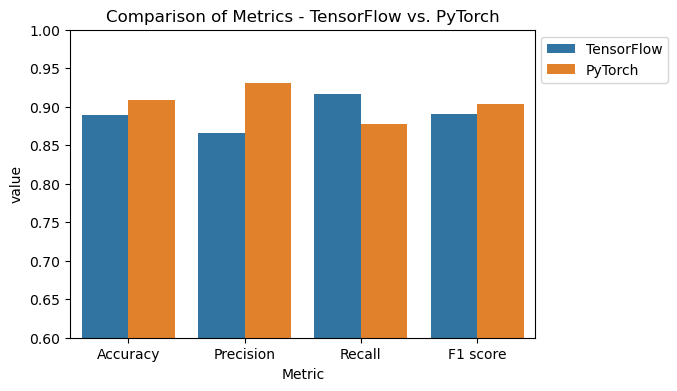

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
precision_tf = precision_score(y_actual_tf, y_test_pred_tf)
precision_pytorch = precision_score(Y_actual_np, y_test_pred_pytorch)

recall_tf = recall_score(y_actual_tf, y_test_pred_tf)
recall_pytorch = recall_score(Y_actual_np, y_test_pred_pytorch)

f1_tf = f1_score(y_actual_tf, y_test_pred_tf)
f1_pytorch = f1_score(Y_actual_np, y_test_pred_pytorch)


data = {
    'Metric': ['Accuracy', 'Precision', 'Recall','F1 score'],
    'TensorFlow': [accuracy_tf, precision_tf, recall_tf,f1_tf ],
    'PyTorch': [accuracy_pytorch, precision_pytorch, recall_pytorch, f1_pytorch]
}

df = pd.DataFrame(data)

# Plotting with Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Metric', y='value', hue='model', data=pd.melt(df, id_vars='Metric', var_name='model', value_name='value'))
plt.title('Comparison of Metrics - TensorFlow vs. PyTorch')
plt.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
plt.ylim(0.6,1)
plt.show()